In [76]:
import glob
import tifffile
import numpy as np
import lightgbm as lgb
import warnings
import tqdm
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore')

In [77]:
train_path =  '/home/sebastien/Documents/projects/solafune-solar-panel-detection/data/train/s2_image/'
mask_path = '/home/sebastien/Documents/projects/solafune-solar-panel-detection/data/train/mask/'

masks = glob.glob(f'{mask_path}/*')
trains = glob.glob(f'{train_path}/*')
masks.sort()
trains.sort()

In [78]:
X = []
y = []
g = []

for i, (t, m) in enumerate(zip(trains, masks)):
    img = tifffile.imread(t).astype(np.float64)
    mask = tifffile.imread(m).astype(np.float64)
    X.append(img.reshape(-1,12))
    y.append(mask.reshape(-1))
    g.append(np.ones_like(mask.reshape(-1))*i)
    
X = np.vstack(X)
y = np.hstack(y)
g = np.hstack(g) 

In [79]:
test_path =  '/home/sebastien/Documents/projects/solafune-solar-panel-detection/data/evaluation/'
test_mask_path = '/home/sebastien/Documents/projects/solafune-solar-panel-detection/data/sample/'
#test_path =  '/tmp/kaggledata/solafue_solars/train/s2_image/'
#test_mask_path = '/tmp/kaggledata/solafue_solars/train/mask/'

masks = glob.glob(f'{test_mask_path}/*')
tests = glob.glob(f'{test_path}/*')
masks.sort()
tests.sort()

In [80]:
import os
if not os.path.isdir('output1'):
    os.mkdir('output1')

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, test_size=0.10)

# Average CV score on the training set was: 0.7454340084081921
exported_pipeline = LinearSVC(C=0.01, dual=False, loss="squared_hinge", penalty="l1", tol=0.01)

exported_pipeline.fit(X_test, y_test)

results = exported_pipeline.predict(X_test)

In [83]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, results)

In [84]:
print("f1 score:", f1)

f1 score: 0.7415842076475561


In [85]:
import os
if not os.path.isdir('output1'):
    os.mkdir('output1')

In [86]:
for i, (m, t) in tqdm.tqdm(enumerate(zip(masks, tests))):
    basename = os.path.basename(m)
    output_file = f'output1/{basename}'
    
    img = tifffile.imread(t).astype(np.float64)
    mask = tifffile.imread(m).astype(np.float64)
    
    X = img.reshape(-1, 12) 
    shape_mask = mask.shape

    pred = exported_pipeline.predict(X)
    pred = pred.astype(np.uint8)

    # pred_mask = np.argmax(pred, axis=1).astype(np.uint8)
    pred_mask = pred.reshape(shape_mask[0], shape_mask[1])

    tifffile.imwrite(output_file, pred_mask)

2066it [00:05, 403.25it/s]


In [87]:
pred_mask.shape

(23, 23)

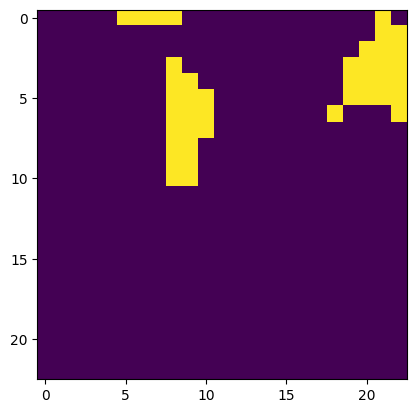

In [88]:
import matplotlib.pyplot as plt

plt.imshow(pred_mask)

In [58]:
pred_mask.shape

(23, 23)

In [59]:
type(pred_mask)

numpy.ndarray

In [60]:
np.unique(pred_mask)

array([0., 1.])